#Importing libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns


#Importing the dataset

In [ ]:
d1=pd.read_csv('/content/Bank Marketing Data Set.csv')

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

#Importing libraries

In [ ]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import statsmodels
import scipy.stats as stats


#Analysis of the dataset

In [ ]:
import statsmodels.stats.proportion as smpt
from sklearn import model_selection


In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score,cohen_kappa_score

In [ ]:
d1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campain      0
pdays        0
previous     0
poutcome     0
class        0
dtype: int64

In [ ]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only= d1.select_dtypes(include= num_col)

In [ ]:
cat_col=['object']
df_catcols_only=d1.select_dtypes(include=cat_col)

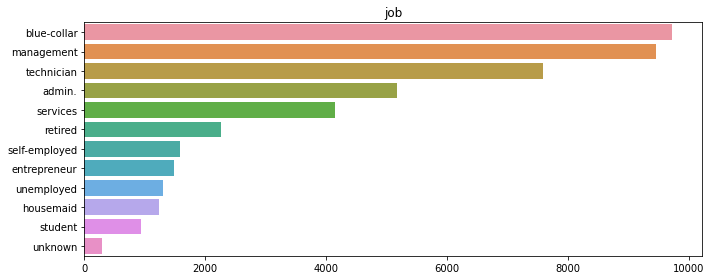

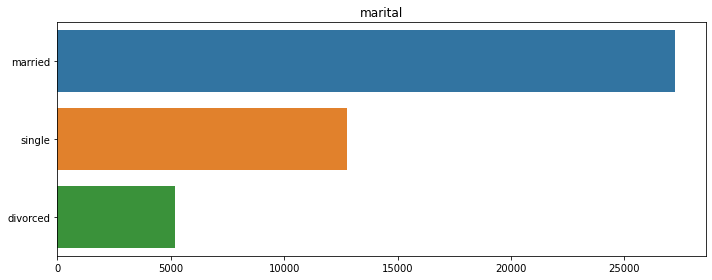

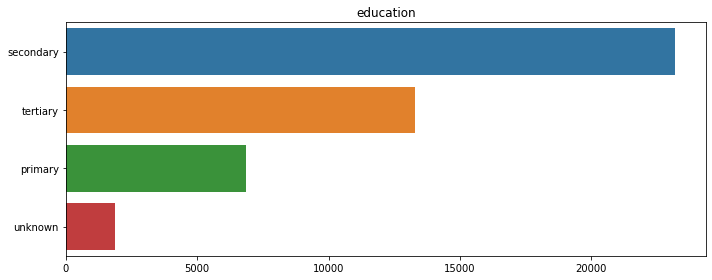

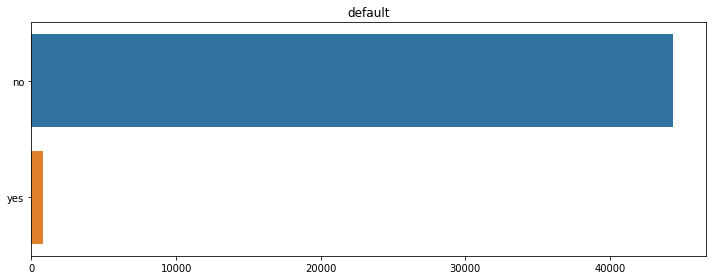

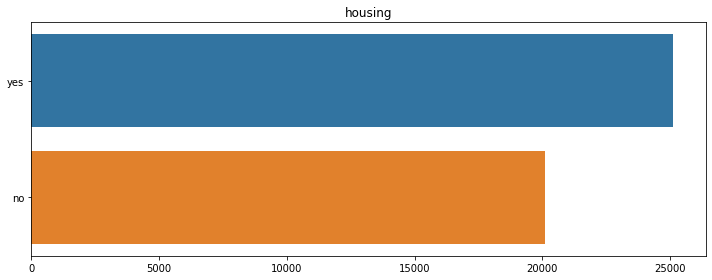

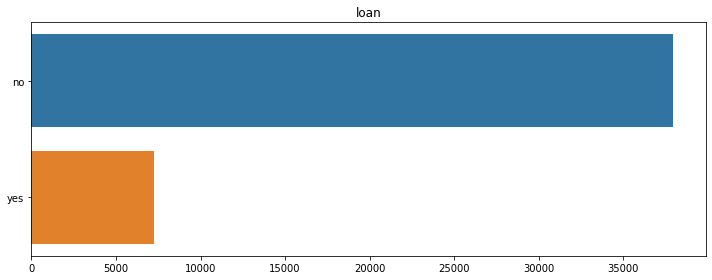

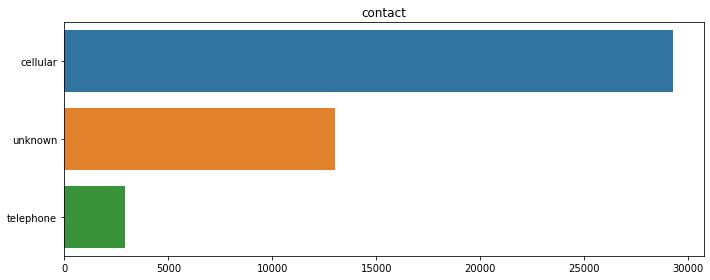

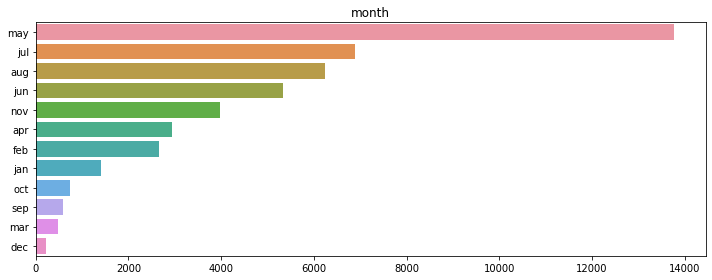

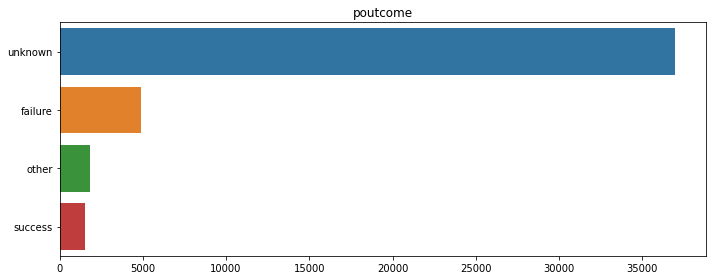

In [ ]:
for col in df_catcols_only:
    plt.figure(figsize=(10,4))
    sns.barplot(d1[col].value_counts().values, d1[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [ ]:
significant_cat_variables = ['education','job']
for var in significant_cat_variables:
    #df[var + '_un'] = 0
    #df[var + '_un'][df[var]=='unknown'] = 1
    #FIXME one-line coding
    d1[var + '_un'] = (d1[var] == 'unknown').astype(int)

In [ ]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [ ]:
cross_tab(d1,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,366,984,119,795
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


In [ ]:
d1.loc[(d1['age']>60) & (d1['job']=='unknown'),'job']='retired'
d1.loc[(d1['education']=='unknown') & (d1['job']=='admin.'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='blue-collar'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='entrepreneur'), 'education'] = 'tertiary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='housemaid'), 'education'] =  'primary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='management'), 'education'] = 'tertiary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='retired'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='self-employed'), 'education'] = 'tertiary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='services'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='student'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='technician'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='unemployed'), 'education'] = 'secondary'

In [ ]:
cross_tab(d1,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4390,0.0,209
blue-collar,149,5825,0.0,3758
entrepreneur,762,542,0.0,183
housemaid,173,395,0.0,672
management,8043,1121,0.0,294
retired,371,1119,0.0,796
self-employed,872,577,0.0,130
services,202,3607,0.0,345
student,223,671,0.0,44


In [ ]:
d1.loc[(d1['education']=='unknown') & (d1['job']=='unknown'), 'education'] = 'secondary'

In [ ]:
d1.loc[(d1['education']=='secondary') & (d1['job']=='unknown'), 'job'] = 'blue-collar'
d1.loc[(d1['education']=='tertiary') & (d1['job']=='unknown'), 'job'] = 'blue-collar'
d1.loc[(d1['education']=='primary') & (d1['job']=='unknown'), 'job'] = 'management'

In [ ]:
cross_tab(d1,'job','education')

,tertiary,secondary,primary
job,,,
admin.,572,4390,209
blue-collar,183,6007,3758
entrepreneur,762,542,183
housemaid,173,395,672
management,8043,1121,344
retired,371,1119,796
self-employed,872,577,130
services,202,3607,345
student,223,671,44


In [ ]:
d1['pdays'].replace(to_replace=-1,value=0,inplace=True)

In [ ]:
d1.rename(columns={'class':'deposit','campain':'campaign'},inplace=True)

In [ ]:
d1['deposit'].replace(to_replace=[1,2],value=[0,1],inplace=True)

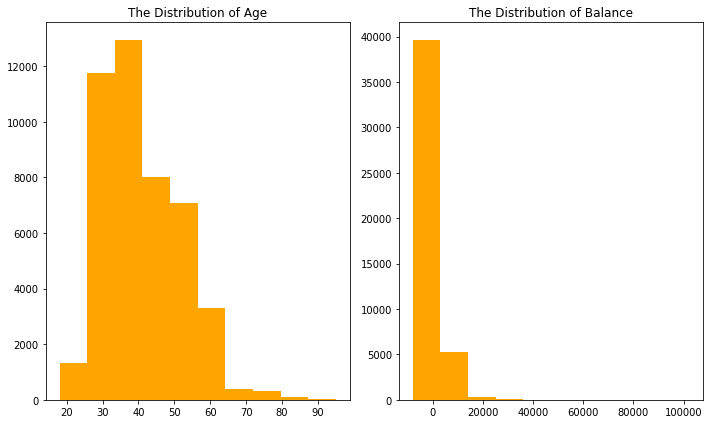

In [ ]:
dist_age_balance = plt.figure(figsize = (10,6))
ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(d1['age'],color='orange')
ra1.set_title('The Distribution of Age')

ra2.hist(d1['balance'], color = 'orange')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

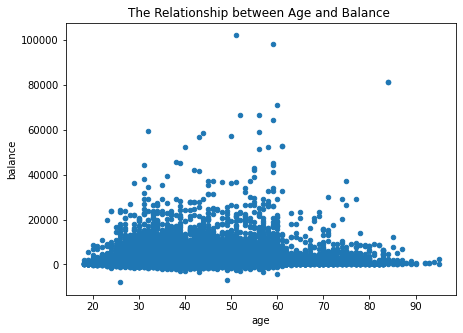

In [ ]:
scatter_age_balance = d1.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

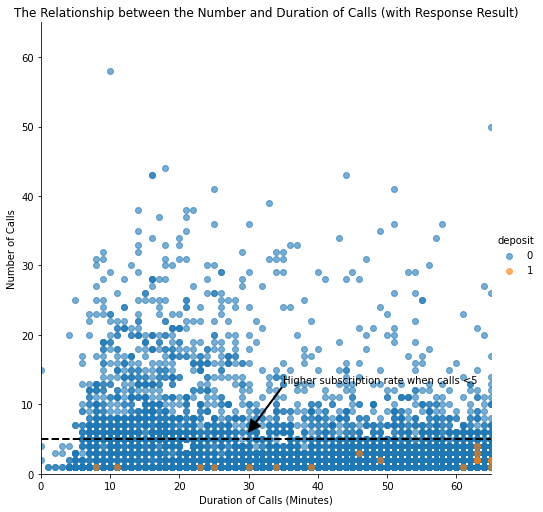

In [ ]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = d1,
                     hue = 'deposit',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))

plt.show()

In [ ]:
d1.drop(['education_un','job_un'],axis=1,inplace=True)

In [ ]:
corr_data = d1
corr = corr_data.corr()
corr

,age,balance,day,duration,campaign,pdays,previous,deposit
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023841,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003330,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093024,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001584,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088508,-0.032855,-0.073172
pdays,-0.023841,0.003330,-0.093024,-0.001584,-0.088508,1.000000,0.454288,0.103323
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454288,1.000000,0.093236
deposit,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103323,0.093236,1.000000


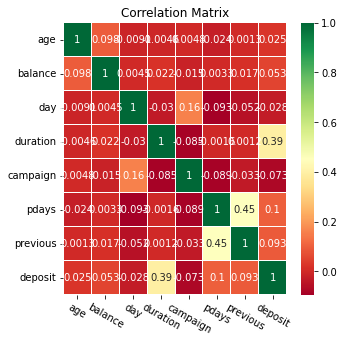

In [ ]:
corr_data = d1
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.1,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
lst = [d1]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [ ]:
count_age_response_pct = pd.crosstab(d1['deposit'],d1['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [ ]:
age = pd.DataFrame(d1['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct[1]
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

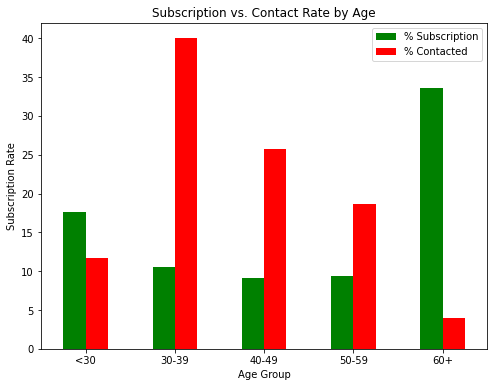

In [ ]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

In [ ]:
lst = [d1]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [ ]:
count_balance_response_pct = pd.crosstab(d1['deposit'],d1['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [ ]:
bal = pd.DataFrame(d1['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

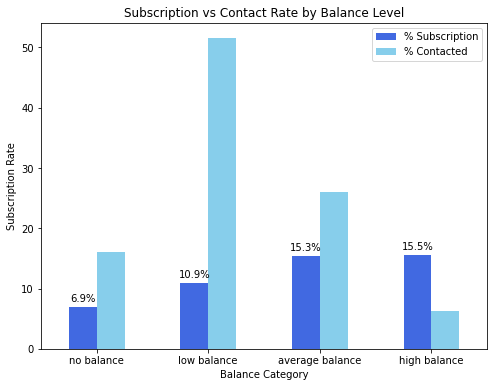

In [ ]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [ ]:
d1['response']=d1['deposit']
d1['response'].replace(to_replace=[0,1],value=['no','yes'],inplace=True)

In [ ]:
age_balance1 = pd.DataFrame(d1.groupby(['age_group','balance_group'])['deposit'].sum())
age_balance2 = pd.DataFrame(d1.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['deposit']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['deposit','response'],axis =1)

age_balance1 = age_balance1.unstack()

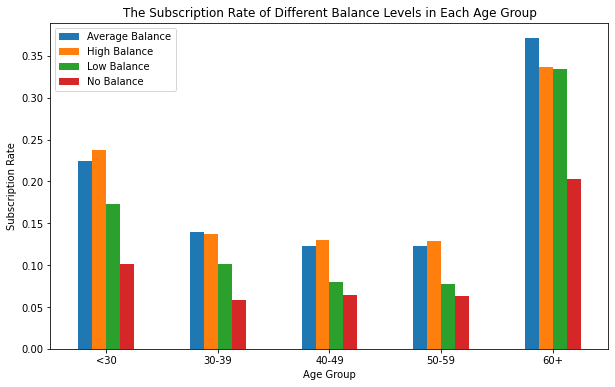

In [ ]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

In [ ]:
count_job_response_pct = pd.crosstab(d1['response'],d1['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

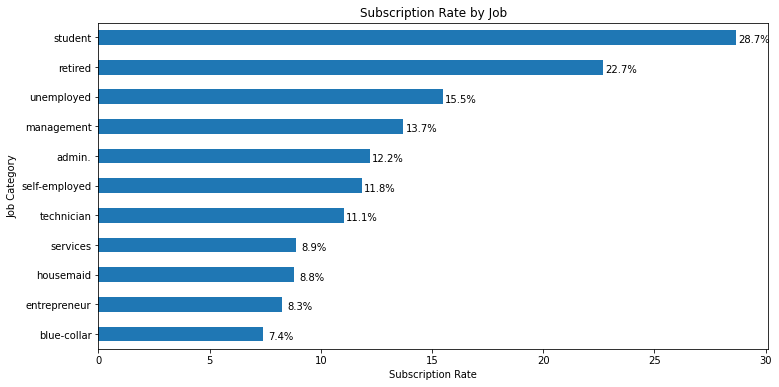

In [ ]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [ ]:
lst = [d1]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [ ]:
count_month_response_pct = pd.crosstab(d1['response'],d1['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [ ]:
month = pd.DataFrame(d1['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

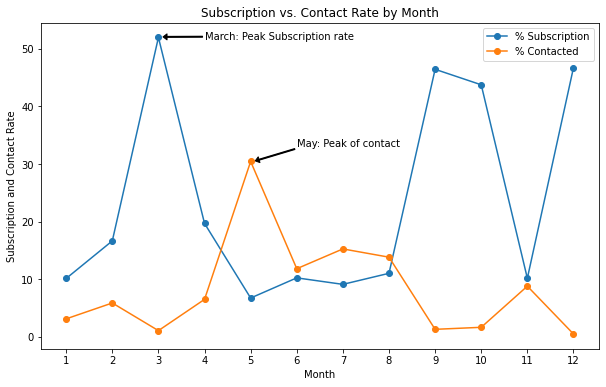

In [ ]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [ ]:
d2=d1.drop(['age_group','balance_group','response','month_int'],axis=1,inplace=True)

In [ ]:
d2=d1
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only= d2.select_dtypes(include= num_col)
df_numcols_only.drop(columns=['deposit'],axis=1,inplace=True)

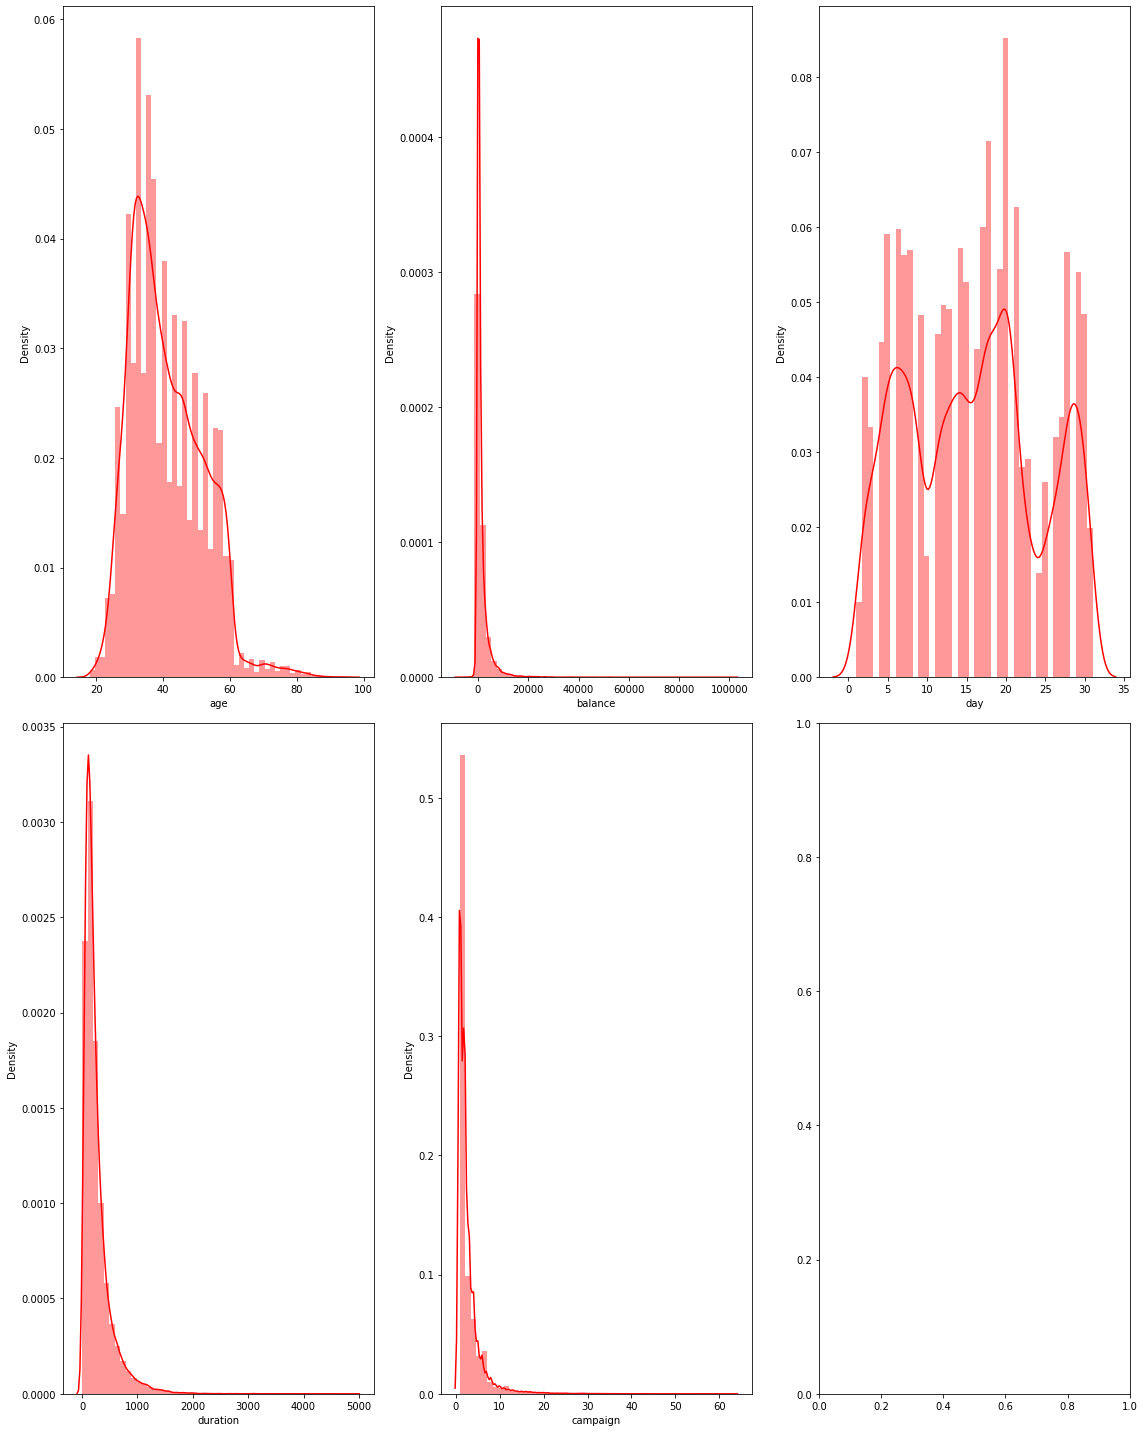

In [ ]:
columns=['age', 'balance', 'day','duration','campaign']
fig,ax = plt.subplots(2,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(d1[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

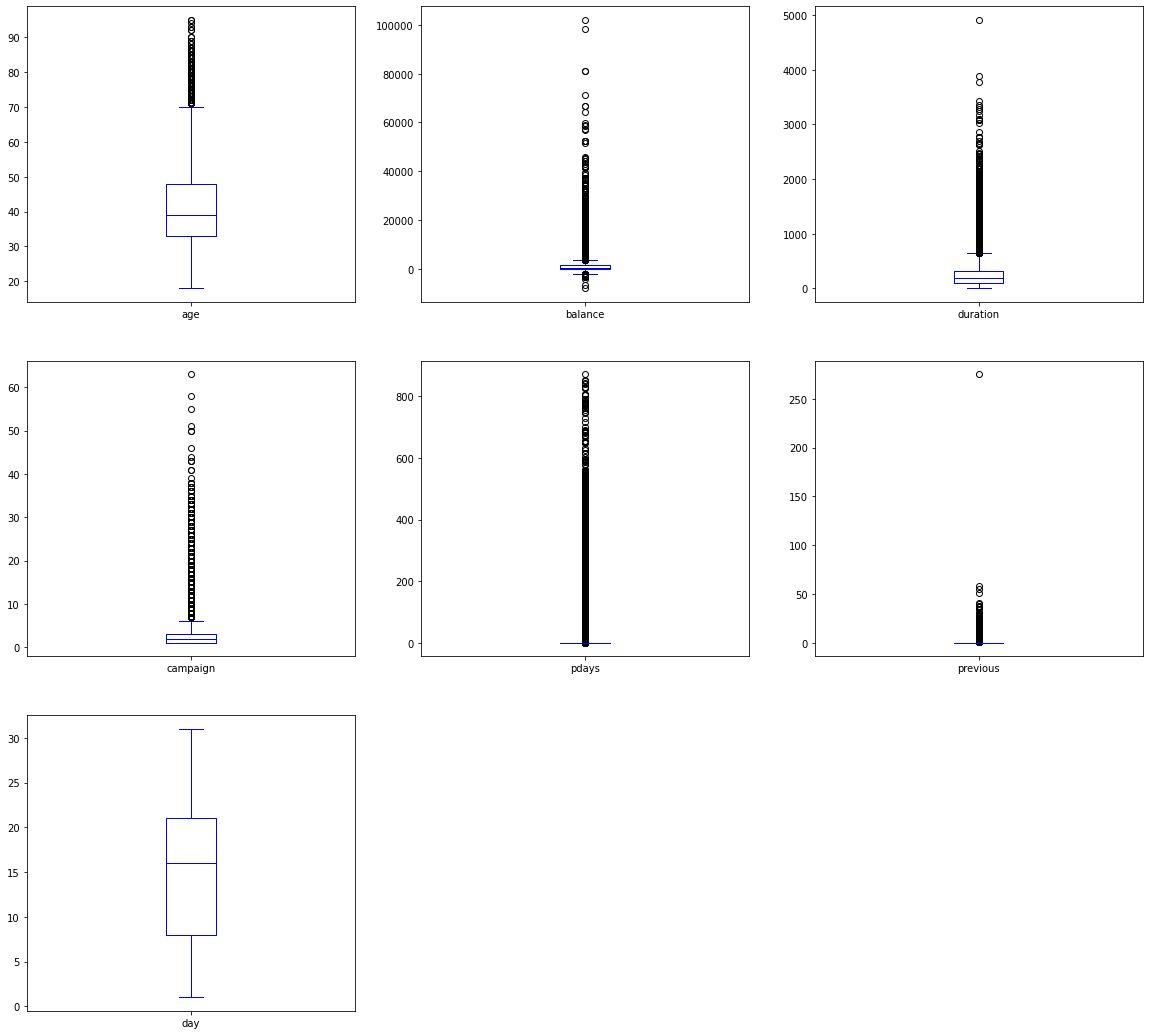

In [ ]:
d2[['age','balance','duration','campaign','pdays','previous','day']].plot(kind= 'box' ,layout=(4,3),subplots=True, sharex=False, sharey=False, figsize=(20,25),color='blue')
plt.show()

In [ ]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only1= d2.select_dtypes(include= num_col)

In [ ]:
df_numcols_only1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

In [ ]:
d2['age']=zscore(d2['age'])
d2['balance']=zscore(d2['balance'])
d2['duration']=zscore(d2['duration'])
d2['campaign']=zscore(d2['campaign'])
d2['pdays']=zscore(d2['pdays'])
d2['previous']=zscore(d2['previous'])
d2['day']=zscore(d2['day'])

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
d2.loc[d2.age > 3, 'age'] = np.nan
numeric1=d2[['age']]
imputer = KNNImputer(missing_values=np.nan)
d2['age'] = imputer.fit_transform(numeric1)


d2.loc[d2.age > 3, 'duration'] = np.nan
numeric2=d2[['duration']]
imputer = KNNImputer(missing_values=np.nan)
d2['duration'] = imputer.fit_transform(numeric2)


d2.loc[d2.age > 3, 'campaign'] = np.nan
numeric3=d2[['campaign']]
imputer = KNNImputer(missing_values=np.nan)
d2['campaign'] = imputer.fit_transform(numeric3)


d2.loc[d2.age > 3, 'pdays'] = np.nan
numeric4=d2[['pdays']]
imputer = KNNImputer(missing_values=np.nan)
d2['pdays'] = imputer.fit_transform(numeric4)


d2.loc[d2.age > 3, 'previous'] = np.nan
numeric5=d2[['previous']]
imputer = KNNImputer(missing_values=np.nan)
d2['previous'] = imputer.fit_transform(numeric5)


d2.loc[d2.age > 3, 'day'] = np.nan
numeric6=d2[['day']]
imputer = KNNImputer(missing_values=np.nan)
d2['day'] = imputer.fit_transform(numeric6)

d2.loc[d2.age > 3, 'balance'] = np.nan
numeric7=d2[['balance']]
imputer = KNNImputer(missing_values=np.nan)
d2['balance'] = imputer.fit_transform(numeric7)


d2.loc[d2.age < -3, 'balance'] = np.nan
numeric8=d2[['balance']]
imputer = KNNImputer(missing_values=np.nan)
d2['balance'] = imputer.fit_transform(numeric8)

In [ ]:
d2['age']=np.cbrt(d2['age'])
d2['balance']=np.cbrt(d2['balance'])
d2['duration']=np.cbrt(d2['duration'])
d2['campaign']=np.cbrt(d2['campaign'])
d2['pdays']=np.cbrt(d2['pdays'])
d2['previous']=np.cbrt(d2['previous'])
d2['day']=np.cbrt(d2['day'])

In [ ]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only1= d2.select_dtypes(include= num_col)
df_numcols_only1=df_numcols_only1.columns
df_numcols_only1

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

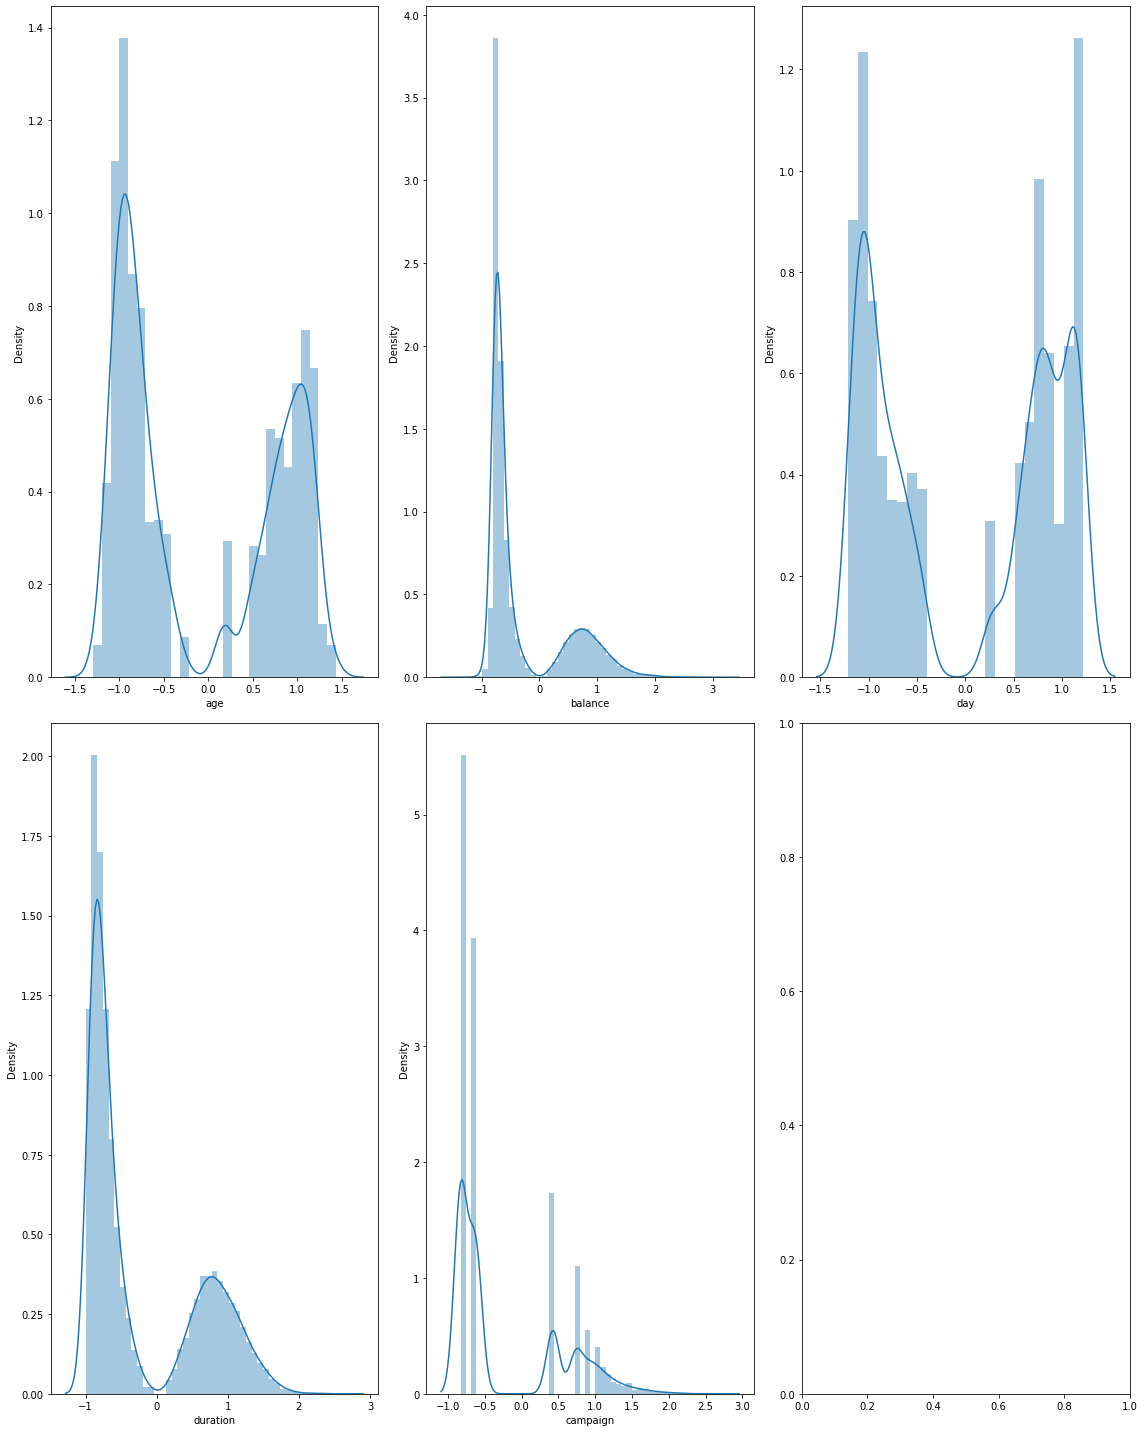

In [ ]:
columns=['age', 'balance', 'day','duration','campaign']
fig,ax = plt.subplots(2,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(d2[col],ax=ax[i])
plt.tight_layout()
plt.show()

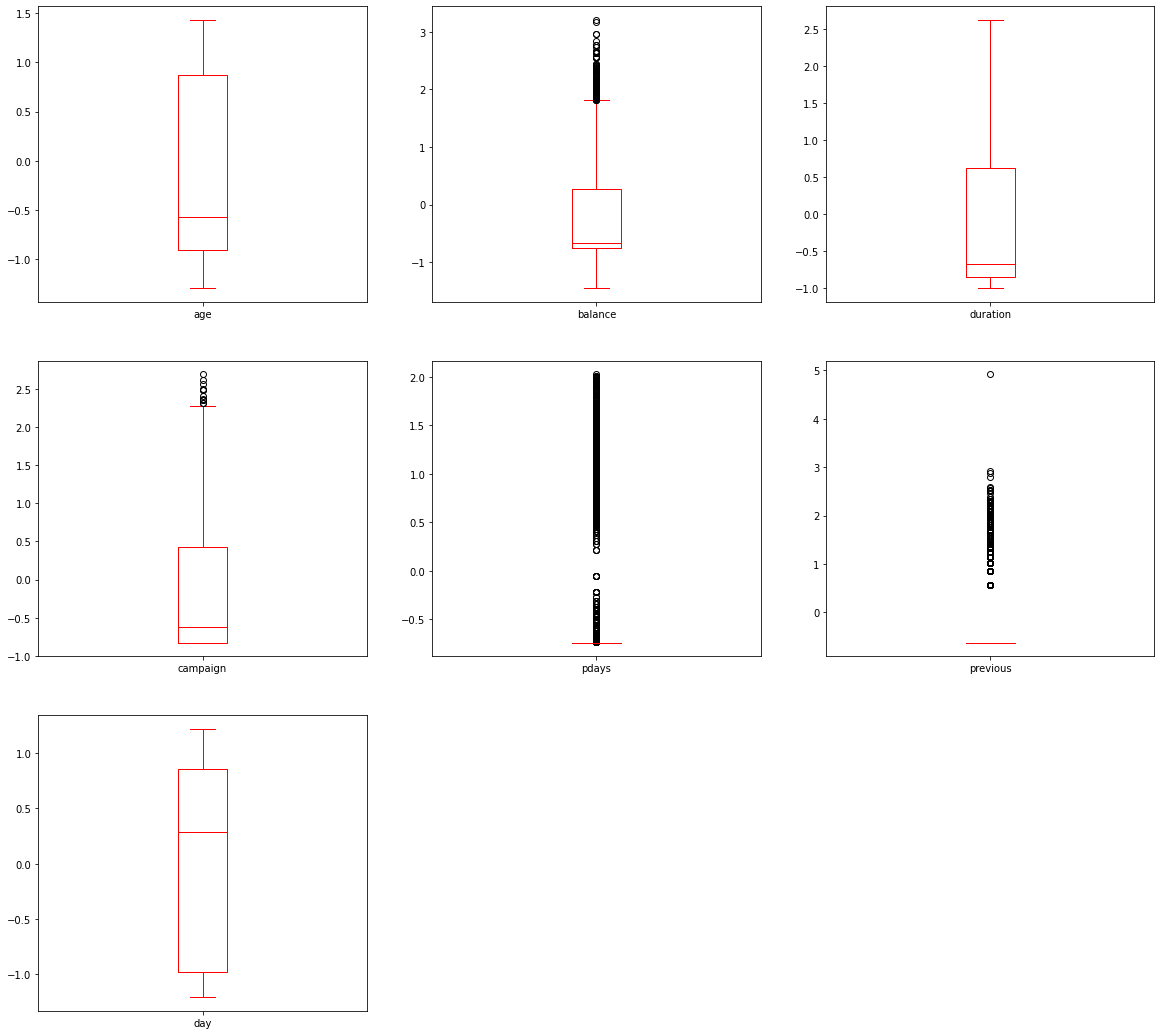

In [ ]:
d2[['age','balance','duration','campaign','pdays','previous','day']].plot(kind= 'box' ,layout=(4,3),subplots=True, sharex=False, sharey=False, figsize=(20,25),color='red')
plt.show()

In [ ]:
cat_col=['object']
df_catcols_only=d2.select_dtypes(include=cat_col)

In [ ]:
df_numcols_only.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
d2=pd.get_dummies(data=d2,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],drop_first=True)

In [ ]:
d3=d2

In [ ]:
cat_col=['object']
df_catcols_only1=d1.select_dtypes(include=cat_col)

NameError: ignored